# TDs - Qubits, entanglement and matrix product sates

## TD1

### Exercice 1 : Time evolution of entanglement

Initialisation :

In [15]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# =========================
# Constantes et paramètres
# =========================

# Physical parameters
J = 1.0
epsilon = 1e-8

# Time discretization
dt = 0.1
Nt = 200

# =========================
# Définition des opérateurs
# =========================

#define Pauli Matrices
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2)

#Hamiltonian
H = -J*np.kron(X,X) + np.pi/4 * np.kron(Y,I) + 0.5 * np.kron(I,Z)

#evolution operator
U = expm(1j*H*dt)
Ud = expm(-1j*H*dt) #U dagger

# =========================
# État initial
# =========================

# initial state
va = np.array([0,1]) #|0>
vb = np.array([0,1]) #|1>
psi0 = np.kron(va,vb) #|01>
rho0 = np.outer(psi0,np.conjugate(psi0)) #|01><01|
# or   np.kron(psi0.conjugate(psi0)).reshape(4,4)

#initialisation des list pour les mesures
purity, entropy_A, averageEnergy = [], [], []

Boucle temporelle

In [16]:
# =========================
# Évolution temporelle
# =========================

rho = rho0
for _ in range(Nt) :
  #evolution dans le temps de rho
  rho = U @ rho @ Ud

  # on veut verifier que l'energie moyenne est conservé donc on la stocka chaque temps
  averageEnergy.append(np.trace(H @ rho))

  #on calcule l'entropie
  rho_A = rho[0:2,0:2] + rho[2:4,2:4] #trace partiel de rho(t)
  eigenValues = np.linalg.eigvals(rho_A) #recuper les eigenvalues
  S = 0
  for i in eigenValues :
    S += - (abs(i)+ epsilon) * np.log(abs(i) + epsilon) # avec le epsilon = 1e⁻8 cela permet d eviter les problemes d instabilité numerique
  entropy_A.append(S)

  #on calcul la purity
  purity.append(np.trace(rho_A @ rho_A))

Plot

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


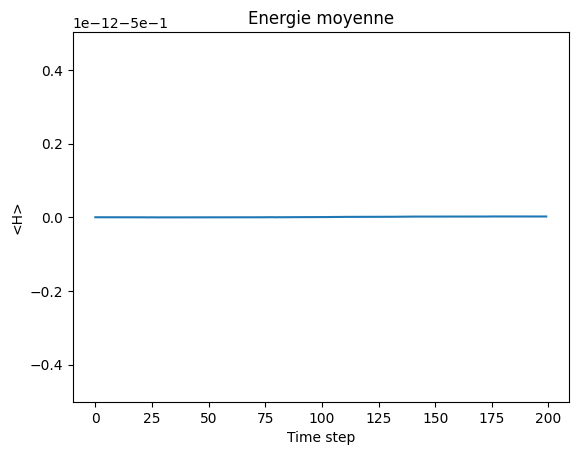

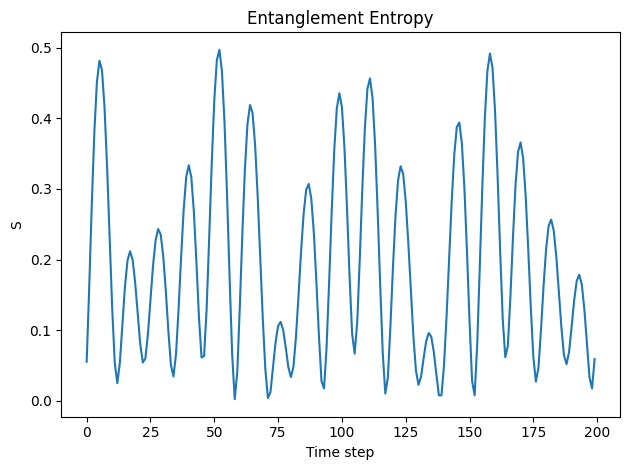

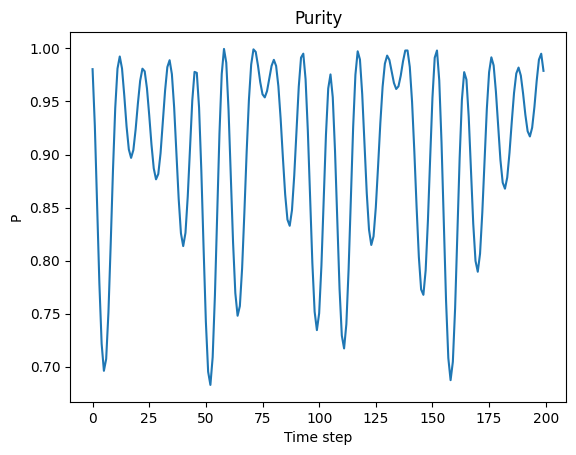

In [17]:
# =========================
# Graphique
# =========================

#figure de la conservation d'energie
plt.figure()
plt.plot(averageEnergy)
plt.xlabel("Time step")
plt.ylabel("<H>")
plt.title("Energie moyenne")
plt.show()

#figure de l'entropie
plt.figure()
plt.plot(entropy_A)
plt.title("Entanglement Entropy")
plt.xlabel("Time step")
plt.ylabel("S")
plt.tight_layout()
plt.show()

#figure de la purity
plt.figure()
plt.title("Purity")
plt.xlabel("Time step")
plt.ylabel("P")
plt.plot(purity)
plt.show()


Time averaged values as function of T

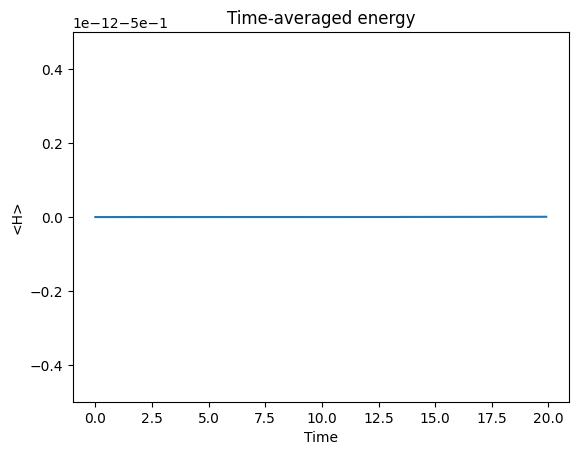

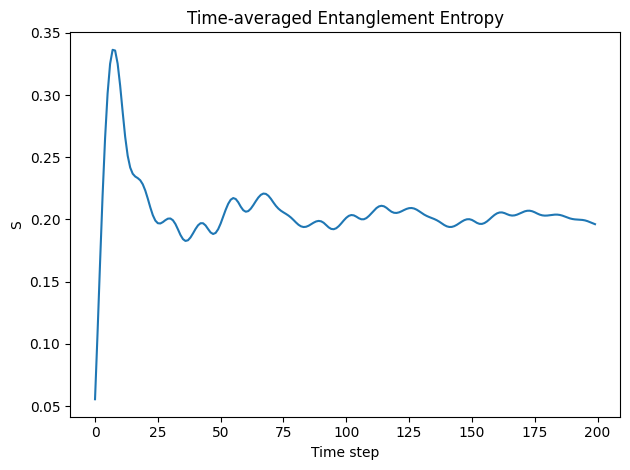

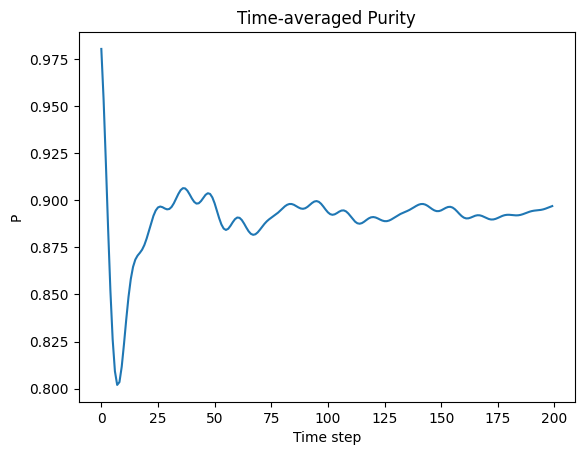

In [21]:
# =========================
# Moyennage temporel
# =========================

averageEnergy_T = []
entropy_A_T = []
purity_T = []
time = np.arange(len(averageEnergy)) * dt

for n in range(1, len(averageEnergy) + 1):
    averageEnergy_T.append(np.mean(averageEnergy[:n]))
    entropy_A_T.append(np.mean(entropy_A[:n]))
    purity_T.append(np.mean(purity[:n]))

#figure de la conservation d'energie
plt.figure()
plt.plot(time, averageEnergy_T)
plt.xlabel("Time")
plt.ylabel("<H>")
plt.title("Time-averaged energy")
plt.show()

#figure de l'entropie
plt.figure()
plt.plot(entropy_A_T)
plt.title("Time-averaged Entanglement Entropy")
plt.xlabel("Time step")
plt.ylabel("S")
plt.tight_layout()
plt.show()

#figure de la purity
plt.figure()
plt.title("Time-averaged Purity")
plt.xlabel("Time step")
plt.ylabel("P")
plt.plot(purity_T)
plt.show()

